In [6]:
# part_3_of_project

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns

from scipy.stats import kurtosis, skew

def plotting(x, activation = None, normalization = None, plot = True, **kwargs):
    x_cols = x.columns
    x = np.asarray(x)

    if activation:
        x = activation(x, **kwargs)
        activation = activation.__name__.upper()
    else:
        activation = 'NONE'
        
        
    if normalization:
        x = normalization().fit_transform(x)
        normalization = normalization.__name__.upper()
    else:
        normalization = 'NONE'
        
    if plot: 
        fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
        fig.suptitle(('The distribution of the data with {} normalization for an activation'
                      ' function of {}'.format(normalization ,activation)), fontsize=16)

        for i in range(x.shape[1]):
            ax[0].hist(x[:,i], alpha = 0.2)
        ax[0].legend(x_cols)   
        ax[1] = sns.boxplot(data = x)
        plt.xticks(rotation=15)
        plt.show()

    return pd.DataFrame(data = x, columns = x_cols), kurtosis(x), skew(x)


def root(x, power, inverse = False):
    return x ** power if not inverse else x ** 1/power


def log(x, inverse = False):
    return np.log(x) if not inverse else np.exp(x)



In [3]:
path = '../data/Boston_Housing_Market_Challenge/boston_clusters.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Clusters
0,0,178,Arlington,29,3567,-77.098798,38.872313,29.9,29.9,0.06642,...,0.51,6.860,74.4,2.9153,5,296,16.6,391.27,6.92,0
1,1,177,Arlington,29,3566,-77.097298,38.875713,24.6,24.6,0.05425,...,0.51,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,0
2,2,176,Arlington,29,3565,-77.095098,38.878213,23.2,23.2,0.07022,...,0.51,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,0
3,3,175,Arlington,29,3564,-77.105798,38.888213,29.4,29.4,0.06664,...,0.51,6.546,33.1,3.1323,5,296,16.6,390.96,5.33,0
4,4,174,Arlington,29,3563,-77.124298,38.885713,22.6,22.6,0.08447,...,0.51,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,0


In [8]:
X_cols = ['CMEDV', 'CRIM', 'INDUS', 'AGE', 'DIS', 'LSTAT', 'RAD']
y_col = ['NOX']

X = df[X_cols]
y = df[y_col]




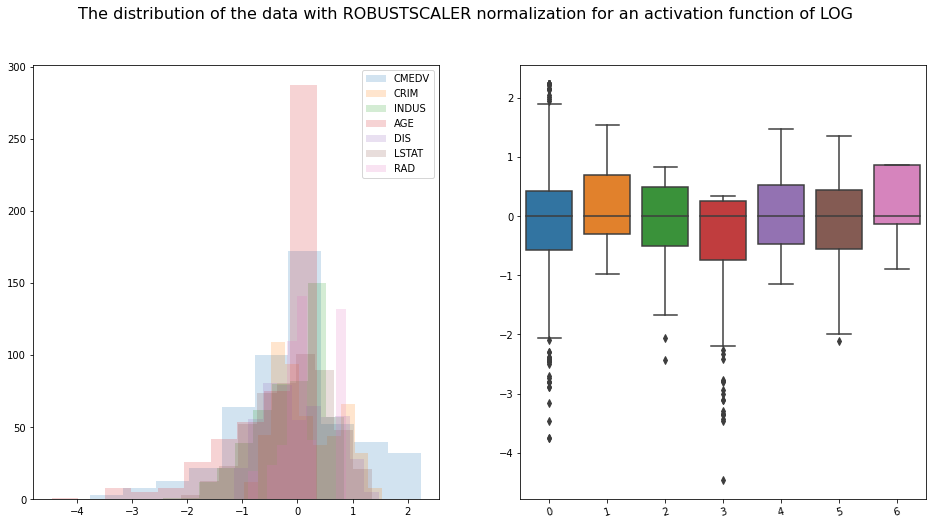

In [9]:
X, kurts, skews = plotting(X, activation = log, normalization = RobustScaler)


# create dataframes for each cluster
dfs = [X[df.Clusters == cluster] for cluster in np.unique(df.Clusters)]

In [74]:
# load regression model
model = pickle.load(open('SVR.pkl', 'rb'))

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[change_var] = var
<ipython-input-110-ffe1b4bbc2bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

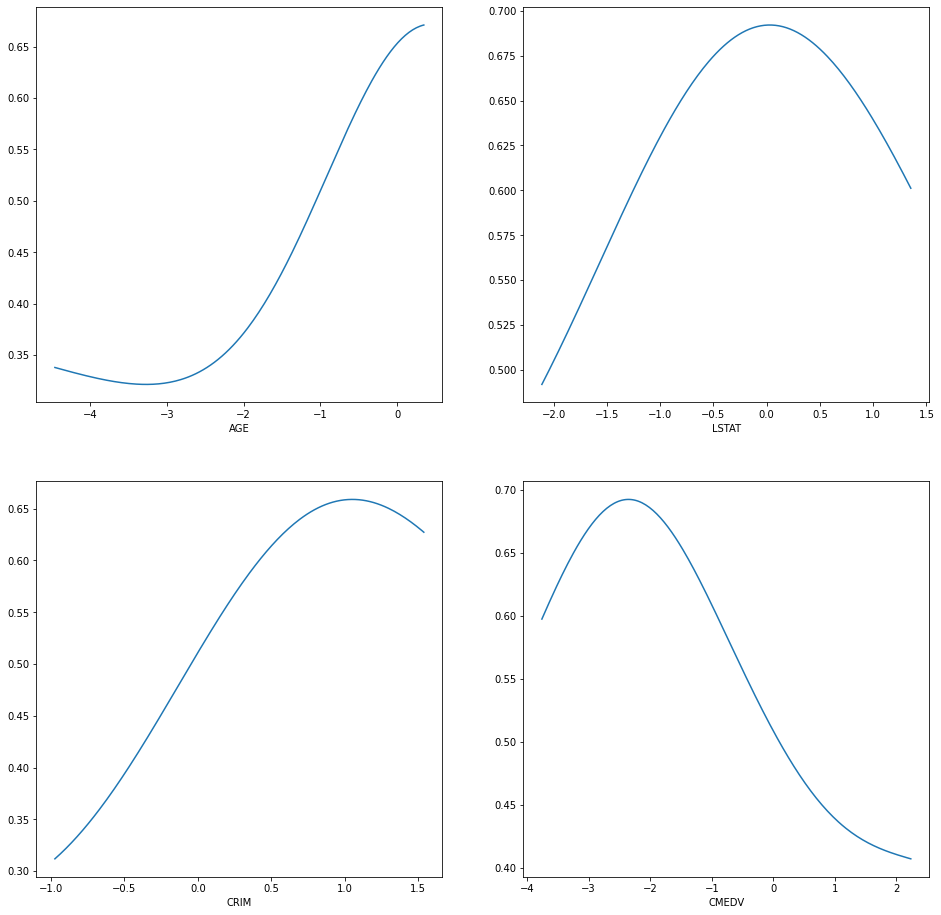

In [110]:
change_vars = ['AGE', 'LSTAT', 'CRIM', 'CMEDV']

low = 1
med = 2
high = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,16))
NOX = []


i = 0
ax = axes[0]
for change_var in change_vars:
    var_range = np.linspace(X[change_var].min(), X[change_var].max(), 200)
    predictions = []
    for var in var_range:
        df_temp = dfs[low]
        df_temp[change_var] = var
        y_hat = model.predict(df_temp)
        y_hat_avg = y_hat.mean()
        predictions.append(y_hat_avg)
    ax[i].plot(var_range, predictions)
    ax[i].set_xlabel(change_var)
    i += 1
    if i > 1:
        i = 0
        ax = axes[1]
#    predictions = [dfs[low] ]

/Users/yousefnami/opt/anaconda3/envs/ai_hack_2021/lib/python3.8/site-packages/sklearn/inspection/_plot/partial_dependence.py:732: UserWarning: Attempting to set identical bottom == top == 0.40734106337834214 results in singular transformations; automatically expanding.
  ax.set_ylim(self.pdp_lim[1])


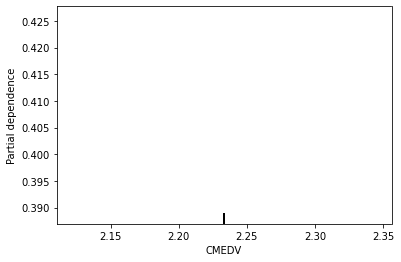

In [117]:
#plot_partial_dependence(model, dfs[1], [])

In [128]:
from sklearn.utils import resample
boot_strapped = resample(dfs[high], n_samples = dfs[low].shape[0])

In [131]:
low_income = dfs[low].copy()
low_income

,CMEDV,CRIM,INDUS,AGE,DIS,LSTAT,RAD
29,2.233291,1.538158,0.500183,0.345914,-0.456689,1.353055,0.875461
31,2.233291,1.538158,0.500183,0.345914,-0.576250,1.353055,0.875461
42,2.233291,1.538158,0.500183,0.345914,-0.903697,1.353055,0.875461
43,2.233291,1.538158,0.500183,0.345914,-0.927685,1.353055,0.875461
44,2.233291,1.538158,0.500183,0.345914,-0.984818,1.353055,0.875461
...,...,...,...,...,...,...,...
433,2.233291,1.538158,0.652377,0.345914,-0.533434,1.353055,-0.124539
435,2.233291,1.538158,0.652377,0.345914,-0.288922,1.353055,-0.124539
436,2.233291,1.538158,0.652377,0.345914,-0.345830,1.353055,-0.124539
456,2.233291,1.538158,0.071099,0.345914,0.147455,1.353055,-0.124539


In [132]:
low_income[change_vars] = boot_strapped[change_vars].values